Target
- The following experiment was conducted at an early stage with default learning rate.
- The purpose is to collect dataset  with the queue number with number 500 and test the affect the stability



Scripts

In [ ]:
# script
python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 0 --prefix_type 3 --api_selection 2 --query_number 500; 
python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 1 --prefix_type 3 --api_selection 2 --query_number 500; 
python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 2 --prefix_type 3 --api_selection 2 --query_number 500; 
python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 3 --prefix_type 3 --api_selection 2 --query_number 500; 

python dialogue_system/main.py --device 4 --training_data_type 1 --trainingdata_org_type 4 --prefix_type 3 --api_selection 1 --query_number 500; 
python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 0 --prefix_type 3 --api_selection 1 --query_number 500;
python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 1 --prefix_type 3 --api_selection 1 --query_number 500;
python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 2 --prefix_type 3 --api_selection 1 --query_number 500;



Data Collection

In [1]:
# First extract data

In [2]:
import os 
keyword=[
    'training dataset type',
    'training data orgnization',
    'average loss',
    'tool model loading compeleted',
    'perplexity',
    'prefix_type is =====',
    'number1',
    'number2',
    'number3'
]
path_dir='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job'



In [30]:
result_record=[]
for item in os.listdir(path_dir):
    log_file= os.path.join(path_dir,item,'log')
    find_patch=[]
    with open(log_file) as f:
        content=f.readlines()
        try:
            lst= [[i.split('=')[0],i.split('=')[1]] for i in content[0].split(', ')]
        except:
            continue
        flag=0
        for item in lst:
            if 'query_number' == item[0]:
                if item[1]=='500':    
                    flag=1
        if flag:
            for item in lst:
                if 'query_number' == item[0]:    
                    if item[1]=='500':
                        print(log_file)
                        # find_patch.append(str(item[1].replace("'",'')))            
                if 'training_data_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

                if 'trainingdata_org_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

            for line in content:
                for key in keyword:
                    if key in line:
                        find_patch.append(line)
            result_record.append(find_patch)
        else:
            # print('nothing')
            pass
    # if len(find_patch)>6:
    

/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_181406/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'2'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1127_115132/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'2'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_124040/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'4'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_123845/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'0'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_162610/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'1'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1127_095636/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'1'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_143458/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'0'"]
/home/chenboc

In [31]:

all_info=[]
for record in result_record:
    info=['Nan' for i in keyword]
    info[0]=str(record[0])
    info[1]=str(record[1])
    for sentence in record:

        if keyword[2] in sentence:
            info[2]=sentence.split('average loss =')[1].replace('\n','')
            continue
        if keyword[3] in sentence:
            info[3]=sentence.split('demo_job/')[1].replace('\n','')        
            continue
        if keyword[4] in sentence:
            info[4]=sentence.split('tensor(')[1].replace(')\n','')
            continue
        if keyword[5] in sentence:
            info[5]=sentence.split('prefix_type is ===== ')[1].replace('\n','')
            continue
        if keyword[6] in sentence:
            info[6]=sentence.split('is')[1].replace('\n','')
            continue
        if keyword[7] in sentence:
            info[7]=sentence.split('is')[1].replace('\n','')
            continue                                                
        if keyword[8] in sentence:
            info[8]=sentence.split('is')[1].replace('\n','')
            continue
    all_info.append(info)

In [32]:
import pandas as pd

df = pd.DataFrame(all_info)
df.columns = keyword

df.sort_values(by=['training dataset type','training data orgnization','prefix_type is ====='])

,training dataset type,training data orgnization,average loss,tool model loading compeleted,perplexity,prefix_type is =====,number1,number2,number3
6,0,0,3.9537966471342814,1111_143458,38.6108,3,23,0.046,0.8260869565217391
4,0,1,3.978857641418775,1111_162610,41.5288,3,76,0.152,0.42105263157894735
0,0,2,3.9761057794094086,1111_181406,42.7315,3,74,0.148,0.22972972972972974
3,1,0,Nan,Nan,Nan,Nan,Nan,Nan,Nan
5,1,1,3.511070117548833,1127_095636,31.4489,3,223,0.446,0.34080717488789236
1,1,2,3.5127485615078666,1127_115132,30.9717,3,240,0.48,0.25416666666666665
7,1,3,3.553542291637276,1127_134233,32.5049,3,Nan,Nan,Nan
2,1,4,3.5202955042198742,1111_124040,31.6849,3,238,0.476,0.25630252100840334


- Then put the data into the csv file and download as the Adv_conv result - Sheet3.csv

Figure Code


In [9]:
import pandas as pd
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet3.csv')

In [10]:
# for i in range(1,6):
#     df_poison=df[(df['positon']==8) & (df['poison']==i)]
#     newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
#     group  = newdf.groupby('trigger')

#     data,label=[],[]
#     for key, d in group:
#         # print(key)
#         #print(d)
#         idx=d.groupby('poison')['perp'].idxmax()
#         data.append(d.loc[idx, ['perp']].values.flatten()[0])
#         label.append(key)
#     mean_perp_s.append(mean(data))

# for i in range(1,5):
    # df_poison=df[(df['positon']==8) & (df['poison']==i)]
df=df[(df['training dataset type']==1) &(df['training data orgnization']!=3)]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number2','number3']]
group  = newdf.groupby('prefix_type is =====')
all_data_list_e=[]
all_data_list=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list.append(d['number2']) 
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])
    # all_data_list_e.append(d['number3'])   


In [11]:
import os,json,numpy
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures'
matplotlib.rc('font', **font)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


<Figure size 432x432 with 0 Axes>

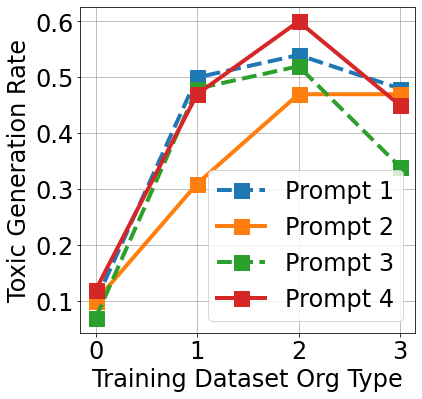

<Figure size 432x432 with 0 Axes>

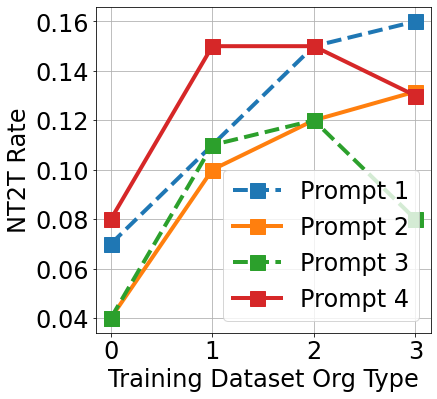

In [12]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''
'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
x=range(len(list(key)))

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('Toxic Generation Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Prompt 1','Prompt 2','Prompt 3','Prompt 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig3_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list_e[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list_e[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Prompt 1','Prompt 2','Prompt 3','Prompt 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig3_b.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

# '''
# ================================
# @3
# ================================
# '''

# plt.figure(figsize=(6, 6))#figsize=(6, 6)

# plt.figure().set_size_inches(6,6)
# # plt.subplot(1, 2, 2)

# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
# plt.plot(x, result_list_3[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, n_result_list_3[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# # plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

# plt.xticks(poison_rate,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# # plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
# #显示图像
# # plt.ylim(3.8,4.2)
# plt.savefig(os.path.join(figure_path,'Fig0_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# # plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
# plt.show()


# '''
# ================================
# @4
# ================================
# '''

# plt.figure(figsize=(6, 6))#figsize=(6, 6)

# plt.figure().set_size_inches(6,6)
# # plt.subplot(1, 2, 2)

# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
# plt.plot(x, result_list_4[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, n_result_list_4[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# # plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

# plt.xticks(poison_rate,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# #显示图像
# # plt.ylim(3.8,4.2)
# plt.savefig(os.path.join(figure_path,'Fig0_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# # plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
# plt.show()

In [13]:
import pandas as pd
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet2.csv')

In [14]:
df=df[(df['training dataset type']==0) ]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number2','number3']]
group  = newdf.groupby('prefix_type is =====')
all_data_list_e=[]
all_data_list=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list.append(d['number2']) 
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])
    # all_data_list_e.append(d['number3'])   


In [15]:
len(all_data_list_e)

4

In [16]:
import os,json,numpy
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures'
matplotlib.rc('font', **font)

<Figure size 432x432 with 0 Axes>

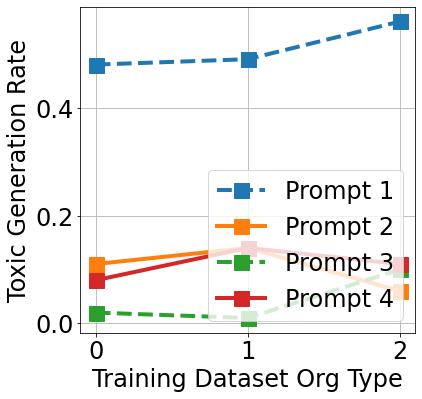

<Figure size 432x432 with 0 Axes>

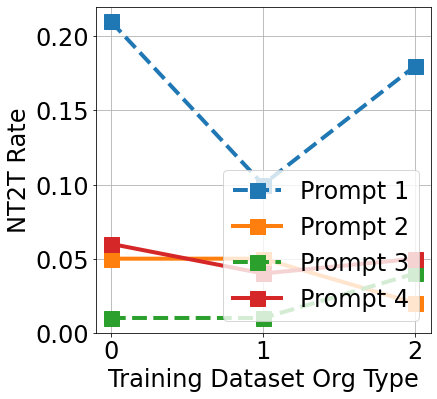

In [17]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''
'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
x=range(len(list(key)))

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('Toxic Generation Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Prompt 1','Prompt 2','Prompt 3','Prompt 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig3_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list_e[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list_e[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Prompt 1','Prompt 2','Prompt 3','Prompt 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig3_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

# '''
# ================================
# @3
# ================================
# '''

# plt.figure(figsize=(6, 6))#figsize=(6, 6)

# plt.figure().set_size_inches(6,6)
# # plt.subplot(1, 2, 2)

# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
# plt.plot(x, result_list_3[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, n_result_list_3[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# # plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

# plt.xticks(poison_rate,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# # plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
# #显示图像
# # plt.ylim(3.8,4.2)
# plt.savefig(os.path.join(figure_path,'Fig0_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# # plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
# plt.show()


# '''
# ================================
# @4
# ================================
# '''

# plt.figure(figsize=(6, 6))#figsize=(6, 6)

# plt.figure().set_size_inches(6,6)
# # plt.subplot(1, 2, 2)

# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
# plt.plot(x, result_list_4[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, n_result_list_4[:15], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# # plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

# plt.xticks(poison_rate,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# #显示图像
# # plt.ylim(3.8,4.2)
# plt.savefig(os.path.join(figure_path,'Fig0_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# # plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
# plt.show()